In [1]:
%pylab inline
import os
import numpy as np
import astropy.io.fits as pyfits
hscDir=os.path.join(os.environ['homeWrk'],'S16ACatalogs','S16AStandardV2')

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd wrkDir/FPFS2/sim

/lustre/work/xiangchong.li/work/FPFS2/sim


In [3]:
starcat=pyfits.getdata(os.path.join(hscDir,'field/GAMA09H_stars.fits'))
flux=10**((starcat['imag_psf']-27)/(-2.5))   
msk=starcat['imag_psf']>22.
flux=flux[msk]
starcat=starcat[msk]

In [4]:
np.average(flux)

80.03202

(array([2.0000e+00, 2.0000e+00, 2.3100e+02, 4.7170e+03, 1.3978e+04,
        1.4158e+04, 7.1330e+03, 1.9210e+03, 3.4900e+02, 3.1000e+01]),
 array([  0.54450631,  37.19562371,  73.84674111, 110.49785851,
        147.14897592, 183.80009332, 220.45121072, 257.10232812,
        293.75344552, 330.40456292, 367.05568033]),
 <a list of 10 Patch objects>)

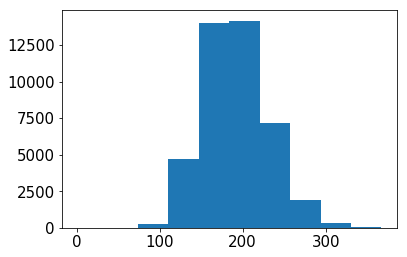

In [5]:
plt.hist(starcat['iflux_psf']/starcat['iflux_psf_err'])

In [6]:
ngrid=64
psfFWHM='60'
psfFname=   os.path.join('./star_psf%s/' %psfFWHM,'psf-%s.fits' %psfFWHM)
psfData   =   pyfits.getdata(psfFname)
npad       =   (ngrid-psfData.shape[0])//2
psfData2 =   np.pad(psfData,(npad+1,npad),mode='constant')
assert psfData2.shape[0]==ngrid

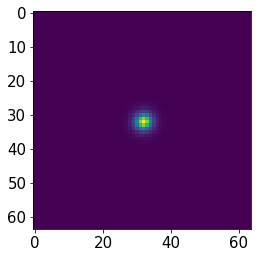

In [7]:
plt.imshow(psfData2)

In [8]:
outfname=os.path.join('star_psf60','image-0-g1-1111.fits')
pyfits.writeto(outfname,10*np.tile(psfData2,(100,100)),overwrite=True)